<a href="https://colab.research.google.com/github/zulfijauh/Data-Science/blob/main/Bank_Jago_Review_from_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dokumentasi ini mengambil review aplikasi Bank Jago di playstore dengan tujuan untuk menganalisa hal-hal yang harus diperbaiki oleh developer untuk meningkatkan kepuasan pelanggan. Selain itu, untuk menunjukan pelayanan apa saja yang sudah baik dan harus pertahankan.



* By: Zulfi Jauarul Ikhsan
* Say Hi!: https://www.linkedin.com/in/zulfi-jauharul-ikhsan-b1b9071bb/
* Codes documentation: https://github.com/zulfijauh/Data-Science

In [2]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.5-py3-none-any.whl size=24484 sha256=0aec54d38244048af81178ccd6d44f60f14cead17a82a4ae5e848cdb2cff3ce4
  Stored in directory: /root/.cache/pip/wheels/4a/26/18/48fda51f20c9e550c735fa6f3a6887dc8836f8d709a3cf8a9c
Successfully built google-play-scraper


In [4]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd
import numpy as np

# Bad Reviews

In [270]:
score_1 = reviews_all('com.jago.digitalBanking', # reviews(count=) untuk spesifik jumlah review
                      sleep_milliseconds=0, # defaults = 0
                      #lang = 'id', #defaults = en
                      country='id', # defaults = 'us'
                      sort=Sort.MOST_RELEVANT, # NEWEST / OLDEST
                      filter_score_with= 1 # Ratings score
                      )

score_2 = reviews_all('com.jago.digitalBanking',
                      sleep_milliseconds=0, 
                      country='id',
                      sort=Sort.MOST_RELEVANT,
                      filter_score_with= 2
                      )

score_3 = reviews_all('com.jago.digitalBanking',
                      sleep_milliseconds=0, 
                      country='id', 
                      sort=Sort.MOST_RELEVANT,
                      filter_score_with= 3
                      )

In [271]:
# Membuat dataframe dengan mnggabungkan data dari rating 1 - 3
bad = pd.DataFrame(score_1).append(pd.DataFrame(score_2).append(pd.DataFrame(score_3)))
# Filter hanya di tahun 2022
bad = bad[bad['at'].dt.year == 2022]
bad.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGXFUvtiq45EN6VhPLBjuNMA4QRnRIcFoykm81...,ERN Purchase,https://play-lh.googleusercontent.com/a/AATXAJ...,I just activated my Jago account and the regis...,1,13,7.1.0,2022-04-19 09:07:48,Hello Jagoan! We apologize for the inconvenien...,2022-04-19 15:19:41
1,gp:AOqpTOGvhWNKyy4Ukx55H00fE6w7IFgRWoZ2pgXQwy3...,Fadlan Hamid Alfebi,https://play-lh.googleusercontent.com/a-/AOh14...,Cannot finish selfie verification. The circle ...,1,2,6.9.2,2022-03-21 06:46:29,Hi Jagoan! Sorry for the inconvenience. Can yo...,2022-03-21 14:29:49
2,gp:AOqpTOHAguRdDD5Mh4MJxhAwgs0E7zTRrinEnqYNWT2...,Muhammad Alvido,https://play-lh.googleusercontent.com/a-/AOh14...,Very dissapointed. I transferred money using j...,1,3,7.2.0,2022-04-22 08:39:13,Hi Jagoan! Sorry for the inconvenience. Can yo...,2022-04-22 12:56:02
3,gp:AOqpTOEbhZauLGKVn49jck4-tPjmSFlxwxBQ-1IvQXw...,Cordelia de Lima,https://play-lh.googleusercontent.com/a/AATXAJ...,Stupid app!! Can not even pass the registratio...,1,25,6.8.2,2022-02-28 05:07:03,Hi Jagoan! Sorry for the inconvenience. Can yo...,2022-02-28 06:32:39
4,gp:AOqpTOFN3hgxLpnBafQqh24fYmsMsTL_msPXnYz7kk8...,Khrista W,https://play-lh.googleusercontent.com/a/AATXAJ...,Worst customer support ever had in Indo's Digi...,1,9,6.4.2,2022-01-14 10:33:17,"Hi Jagoan, so sorry for the inconvenience. We ...",2022-03-07 06:56:33


In [272]:
# Cek isi review sekilas
bad['content']

0      I just activated my Jago account and the regis...
1      Cannot finish selfie verification. The circle ...
2      Very dissapointed. I transferred money using j...
3      Stupid app!! Can not even pass the registratio...
4      Worst customer support ever had in Indo's Digi...
                             ...                        
107    Proses kirim uang lama, tidak ada notifikasi p...
108    Apps bagus tapi bila mau ada maintance, diinfo...
113    Susah untuk login, verifikasi ponsel tidak did...
116                                               I like
196                                              Lag app
Name: content, Length: 478, dtype: object

In [273]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [276]:
# Stopword bahasa indonesia
!pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [298]:
#menggabungkan seluruh review menjadi satu kelompok
bad_text = " ".join(review for review in bad.content)

In [278]:
stop_factory = StopWordRemoverFactory()
# Filter kata yang tidak ingin ditampilkan
more_stopword = ['ngga', 'padahal', 'kan', 'isi', 'muncul', 'mengganggu','terlalu','banyak','bank','yg','gak','ga','mau','sama','baru','pake','jago','pindahin','dipakai','via','hari','jumat','tp','gk','udh','jg','malah','doang','udah', 'lebih','gabisa','salah','kalau','bahkan','tetap','minta','waktu','gimana','kali','bagus','terus','langsung','suruh','pas','sm','aja','nya','bener','coba','bgt','sdh','beberapa','sesuai','dapet','jangan','apa','gw','buat','dr','banget','sekarang','mending','pakai','sekali','jelas','jadi','cuma', 'lah','katanya','kok','dulu'] 
stopword_id = stop_factory.get_stop_words()+more_stopword+list(STOPWORDS)
stopword = stop_factory.create_stop_word_remover()

In [299]:
# Membuat word cloud image:
bad_wordcloud = WordCloud(width = 3000, height = 2000, background_color='black',colormap = 'cool', stopwords = stopword_id, max_words=200).generate(bad_text)

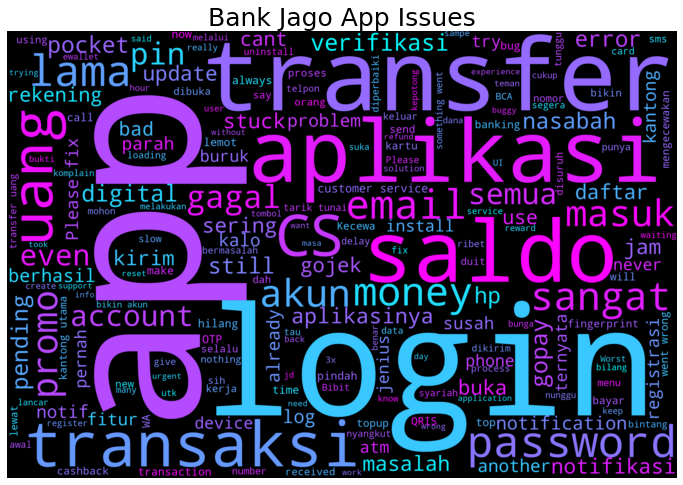

In [300]:

# Display wordcloud
plt.figure(figsize=(12, 25))
plt.imshow(bad_wordcloud,interpolation='bilinear') 
plt.title('Bank Jago App Issues',fontsize = 25)
plt.axis("off");

In [288]:
bad_detail = list(bad['content'][bad['content'].str.contains('CS', regex=False, case=False, na=False)])

# beberapa review dengan keywords app
for i in bad_detail[1:10]:
  print(bad_detail.index(i),')', i, '\n')

1 ) The LEAST RELIABLE banking app ever. Takes TOO long for a single transfer. Can't even handle such a basic function of digital bank like money transfers. No notif whatsoever when it's under maintenance or having issues. The CS is definitely the WORST. No SLA. Even with your proactive follow up efforts, they still take days to give you reply with only ZERO result in the end. And who would believe that your complain has actually been investigated when they can't even get your name right? 

2 ) I can't login today. Please help. Already sent email to cs but no reply. I will change the star rating after a proper help from customer service. 

3 ) stupid app! you'll get emotional when you reinstalled it to new phone, the app will asking 2 step verification without any further notification. then when you chose 'i dont have my blabla', it will asked your login, pass, nik, and some stupid questions about pocket. then it will verify you with otp. so, i made a call to cs and said want to close 

# Good Reviews

In [265]:
score_4 = reviews_all('com.jago.digitalBanking',
                      sleep_milliseconds=0, 
                      country='id',
                      sort=Sort.MOST_RELEVANT,
                      filter_score_with= 4
                      )

score_5 = reviews_all('com.jago.digitalBanking',
                      sleep_milliseconds=0, 
                      country='id', 
                      sort=Sort.MOST_RELEVANT,
                      filter_score_with= 5
                      )

In [266]:
# Membuat dataframe dengan mnggabungkan data dari rating 1 - 3
good = pd.DataFrame(score_4).append(pd.DataFrame(score_5))
# Filter hanya di tahun 2022
good = good[good['at'].dt.year == 2022]
good.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOF6IY2ShWTPdbsB5AmLn_lNEDs8q3QZFK23mxZ...,Adam Anugeraha,https://play-lh.googleusercontent.com/a-/AOh14...,This app is the real digital bank. It is easy ...,4,24,7.2.0,2022-05-14 02:36:25,Hello Jagoan! Thank you for choosing Bank Jago...,2022-05-14 04:37:30
1,gp:AOqpTOG9jlDg9ZyDtMNrZrFzsu6lXv8bCXi7U4Ldp1y...,Kasz,https://play-lh.googleusercontent.com/a-/AOh14...,Almost perfect. Love the service and perks. Th...,4,82,7.2.0,2022-04-21 23:37:14,Hello Jagoan! Thank you for choosing Bank Jago...,2022-04-22 00:26:36
3,gp:AOqpTOHDK_az-Tff2sghKUF7t-6GpgbQPs2agpEBZnh...,Ben Dover,https://play-lh.googleusercontent.com/a-/AOh14...,"Almost a perfect banking app, The best replace...",4,2,7.2.0,2022-05-06 04:21:11,Hello Jagoan! Thank you for choosing Bank Jago...,2022-05-06 07:12:18
4,gp:AOqpTOE9Qh-sUaAEQbDiLT-y0zv_kMll7-WsgwmVqfk...,Aaron Yodo,https://play-lh.googleusercontent.com/a/AATXAJ...,"Overall it's a good app, the interface is a bi...",4,11,6.9.2,2022-03-10 07:14:02,Hi Jagoan! Thank you for your advice. This wil...,2022-03-10 07:25:04
5,gp:AOqpTOEMhSa1TU9qM_U148U3FUD5eo1je9N4VAO4uzz...,Kristy Whanarahardja,https://play-lh.googleusercontent.com/a-/AOh14...,so far ok. one small but irritating issue on H...,4,1,6.9.2,2022-03-22 08:07:42,Hello Jagoan! We apologize for the inconvenien...,2022-03-22 08:23:46


In [267]:
#menggabungkan seluruh review menjadi satu kelompok
good_text = " ".join(review for review in good.content)

In [294]:
# Membuat word cloud image:
good_wordcloud = WordCloud(width = 3000, height = 2000, background_color='black',colormap = 'cool', stopwords = stopword_id, max_words=200).generate(good_text)

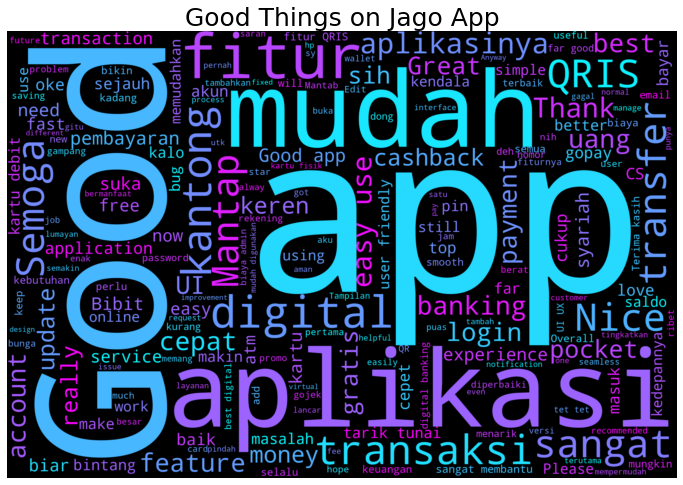

In [296]:
# Display wordcloud
plt.figure(figsize=(12, 25))
plt.imshow(good_wordcloud,interpolation='bilinear') 
plt.title('Good Things on Jago App', fontsize = 25)
plt.axis("off");

In [282]:
good_detail = list(good['content'][good['content'].str.contains('mudah', regex=False, case=False, na=False)])

# beberapa review dengan keywords mudah
for i in good_detail[:10]:
  print(good_detail.index(i),')', i, '\n')

0 ) Registrasinya simple banget, konfirmasinya juga mudah hanya sekali telpon dari petugasnya dan voila 'beres'. Kartunya juga cepat dibuat dan dikirim. Untuk aplikasinya sendiri bagi saya sangat user friendly dan yg paling penting masih 'gratis'. Sayangnya kartu atmnya belum bisa dipakai disetiap mesin atm. Terutama di kota saya, Karawang, belum ada satupun mesin atm yg bisa 'read' kartu jago. 

1 ) been using jago for 6months! wow kaget sendiri.. sejauh ini puas bgt app nya ga bingungin, simple tp detail, ga ada paksaan apa2 semua kita yg atur dan atas seizin kita. mudah bgt di link ke marketplace manapun. physical cardnya membantu bgt budgeting. spend analysis nya👍👍👍 25x free transfernya pas bgt! walau yg ke 26 bayar gpp terasa worth it krn udh digratisin 25x🥰 kurangnya 1: blm bs topup emoney dkk kl bisa wah! atau card nya bisa sekaligus dijadiin emoney gt bakal TOP bgt gaadalawan🙏 

2 ) aplikasinya cukup responsive dan cepat. UI nya juga mudah dimengerti. cuman kadang saat membuka 